Hola! Probando el Google Colab


In [ ]:
%tensorflow_version 1.x

from tensorflow.python.client import device_lib;
import tensorflow as tf;

# Make sure tensorflow 1.x prints below, you may need to restart the runtime. Runtime => Restart Runtime
print(tf.__version__)

print("Show System RAM Memory:\n\n")
!cat /proc/meminfo | egrep "MemTotal*"


print("\n\nShow Devices:\n\n"+str(device_lib.list_local_devices()))

TensorFlow 1.x selected.
1.15.2
Show System RAM Memory:


MemTotal:       13333556 kB


Show Devices:

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17189634996475659791
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 16581110418557076641
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 2252206420724938510
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11330115994
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6601534986618248517
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [3]:

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

csv_file = '/content/drive/My Drive/TFG_AlienEmbarecRiadi/hotel_bookings.csv'
data = pd.read_csv(csv_file, delimiter=',')
print(data.columns)
'''
plt.figure(figsize=(8,8))
sns.countplot(data['distribution_channel'], palette='spring_r', 
              order=pd.value_counts(data['distribution_channel']).index)
plt.title('Distribution Channel Types', weight='bold')
plt.xlabel('Distribution Channel', fontsize=12)
plt.ylabel('Count', fontsize=12)
'''
'''
plt.figure(figsize=(10,10))
sns.countplot(x='agent', data=data, 
              order=pd.value_counts(data['agent']).iloc[:10].index, palette="brg")
plt.title('Top 10 Country of Origin', weight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)
print(data.columns)
print(data.head(5))
'''

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date'], dtype='object')


'\nplt.figure(figsize=(10,10))\nsns.countplot(x=\'agent\', data=data, \n              order=pd.value_counts(data[\'agent\']).iloc[:10].index, palette="brg")\nplt.title(\'Top 10 Country of Origin\', weight=\'bold\')\nplt.xlabel(\'Country\', fontsize=12)\nplt.ylabel(\'Count\', fontsize=12)\nprint(data.columns)\nprint(data.head(5))\n'

In [13]:
print(data.shape)


(119390, 32)


In [39]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(data)

Your selected dataframe has 32 columns and 119390 Rows.
There are 4 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
company,0,112593,94.3,112593,94.3,float64
agent,0,16340,13.7,16340,13.7,float64
country,0,488,0.4,488,0.4,object
children,110796,4,0.0,110800,92.8,float64


In [40]:

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

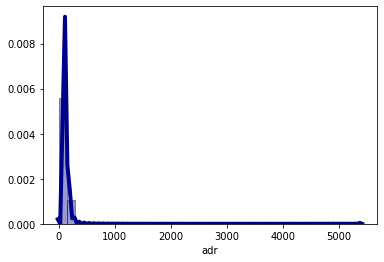

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
'''
manzanas = [20,10,25,30]
nombres = ["Ana","Juan","Diana","Catalina"]
plt.pie(manzanas, labels=nombres, autopct="%0.1f %%")
plt.axis("equal")
plt.show()
'''
'''
plt.figure(figsize=(6,6))
fig, ax = plt.subplots()
plt.axis('equal')
nombres = ["nulos","no-nulos"]
ax.pie(data.company.isnull().value_counts(), labels=nombres, radius=2.5, autopct='%.2f%%', 
       shadow=True)
plt.show()
'''
'''
plt.figure(figsize=(8,8))
sns.countplot(data['adr'], palette='spring_r', 
              order=pd.value_counts(data['adr']).index)
plt.title('adr Count', weight='bold')
plt.xlabel('adr', fontsize=12)
plt.ylabel('Count', fontsize=12)
print(data.children.isnull().sum())
#data['children'] = data['children'].fillna(0)

print(data.children.isnull().sum())
'''

sns.distplot(data['adr'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
print(data.isnull().sum())

In [ ]:



with open('/content/drive/My Drive/TFG_AlienEmbarecRiadi/hotel_bookings.csv') as csv_file:
    df = pd.read_csv(csv_file, delimiter=',')
    try:
      df["total_stayed_nights"] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
    except:
      print("Something went wrong, check that operands are of number type")

    
    for i in range(df["total_stayed_nights"].size):
      try:
        if int(df["total_stayed_nights"][i]) == 0:
          df["weekend_nights_proportion"][i] = 0
        else:
          df["weekend_nights_proportion"][i] = ("%.2f" %((df['stays_in_weekend_nights'][i]/df['total_stayed_nights'][i]) * 100))
      except ValueError:
          print("Something went wrong, check that operands are of number type")

    df.to_csv("/content/drive/My Drive/TFG_AlienEmbarecRiadi/hotel_bookings_modified.csv", index=False)

    

   


KeyError: ignored

In [ ]:
ls

drive/  sample_data/  tfg_ml/


In [ ]:
!pwd

/content
